# Telecom Customer Churn
The goal is to perform exploratory data analysis and understand how these attributes affect churn

### Import required libraries

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')

### Read the data

In [51]:
df=pd.read_csv("telecom_retention_data.csv")

In [52]:
df.sample(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4483,3873-WOSBC,Male,0,Yes,No,67,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),25.6,1784.9,No
5607,2460-FPSYH,Female,1,No,No,40,No,No phone service,DSL,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,55.8,2109.35,Yes
6099,7711-GQBZC,Female,0,Yes,Yes,71,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),24.7,1810.55,No


### Analyse the data

In [53]:
df.shape

(7043, 21)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Observations:
1. Customer churn data contains 7043 rows and 21 columns.
2. The columns present in data are customerID gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn   

### Correct the datatypes

In [55]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Check for null values

In [57]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [58]:
df.dropna(inplace=True)

In [59]:
df.shape

(7032, 21)

Observation:
1. There are 11 null entries in the Totalcharges coloumn
2. Removed the null rows as the percentage of null rows in total data set is less than 5%

### Check the distribution of data

In [60]:
c=df['Churn'].value_counts()
print(c)
ratio=c[1]/c[0]
print(ratio)

Churn
No     5163
Yes    1869
Name: count, dtype: int64
0.36199883788495063


Observation:
1. Data is imbalanced and number of churner to non churner ratio is 0.36

### Describe the data

In [61]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


Observation:
1. Senior citizen column is categorical so the distribution is not proper 

### Check for duplicates

In [62]:
df.duplicated().sum()

0

Observations:
1. no duplicate values are present in the dataset

### Data Cleaning

In [63]:
new_df=df.copy()
new_df.sample()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4754,2072-ZVJJX,Male,0,Yes,No,68,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),25.25,1728.2,No


In [64]:
new_df.shape

(7032, 21)

### Fix the tenure column

In [65]:
print(f"Minimun tenure period is {new_df['tenure'].min()} and maximum tenure period is {new_df['tenure'].max()}")


Minimun tenure period is 1 and maximum tenure period is 72


### Tenure refers to the service duration for customer, we are going to apply binning on it.(0-12) bin1,(12-24) bin2 as so on

In [66]:
bins=math.ceil(new_df['tenure'].max()/12)
bin_label=["{0}-{1}".format(i,i+11) for i in range(1,72,12)]
new_df['tenure_range']=pd.cut(new_df['tenure'],bins=bins,labels=bin_label)

### Remove unwanted columns

In [67]:
new_df.drop(columns=['customerID','tenure'],axis=1,inplace=True)

### Numeric and categorical features

In [68]:
numeric_feature=[feature for feature in new_df if new_df[feature].dtype!='object']
print(len(numeric_feature))
categorical_feature=[feature for feature in new_df if new_df[feature].dtype=='object']
print(len(categorical_feature))

4
16


### Unique categories in categorical columns

In [69]:
for column in categorical_feature:
    print("Unique values in {} are {}".format(column,new_df[column].unique()))

Unique values in gender are ['Female' 'Male']
Unique values in Partner are ['Yes' 'No']
Unique values in Dependents are ['No' 'Yes']
Unique values in PhoneService are ['No' 'Yes']
Unique values in MultipleLines are ['No phone service' 'No' 'Yes']
Unique values in InternetService are ['DSL' 'Fiber optic' 'No']
Unique values in OnlineSecurity are ['No' 'Yes' 'No internet service']
Unique values in OnlineBackup are ['Yes' 'No' 'No internet service']
Unique values in DeviceProtection are ['No' 'Yes' 'No internet service']
Unique values in TechSupport are ['No' 'Yes' 'No internet service']
Unique values in StreamingTV are ['No' 'Yes' 'No internet service']
Unique values in StreamingMovies are ['No' 'Yes' 'No internet service']
Unique values in Contract are ['Month-to-month' 'One year' 'Two year']
Unique values in PaperlessBilling are ['Yes' 'No']
Unique values in PaymentMethod are ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Unique values in Chu

Observation:
1. There are 4 categorical columns and 17 numerical columns present in our dataset

## Data Exploration

### Univariate analysis

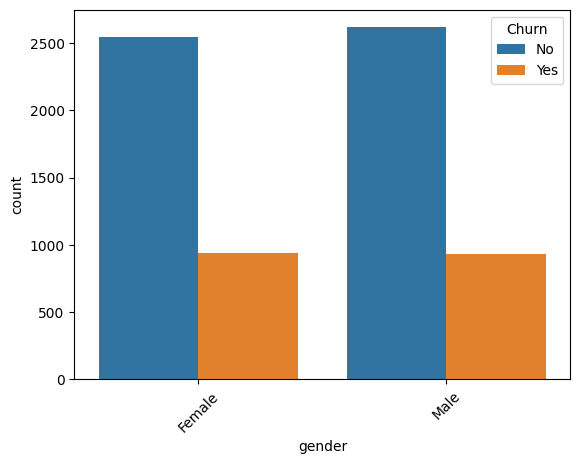

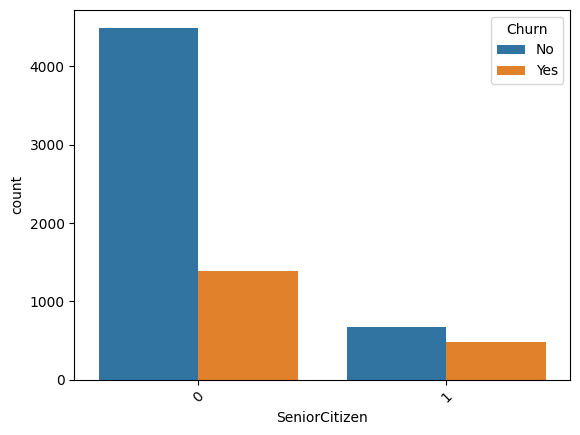

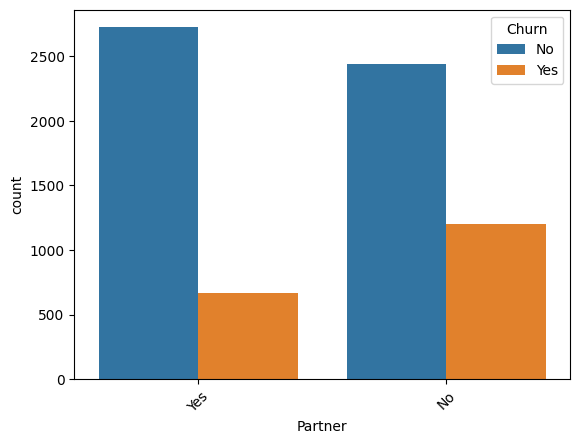

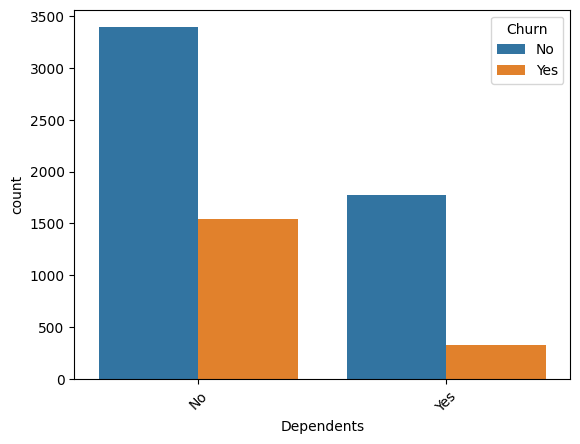

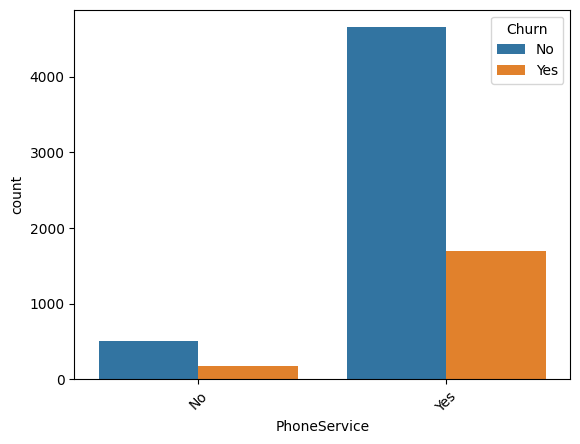

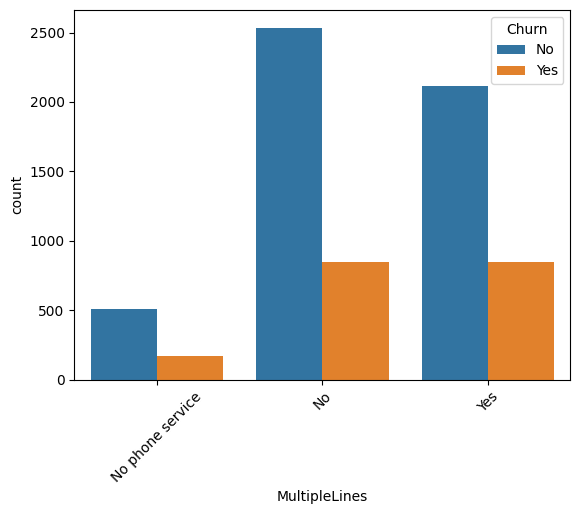

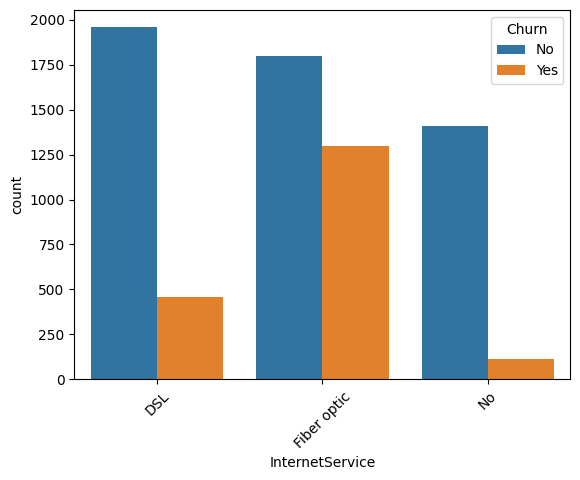

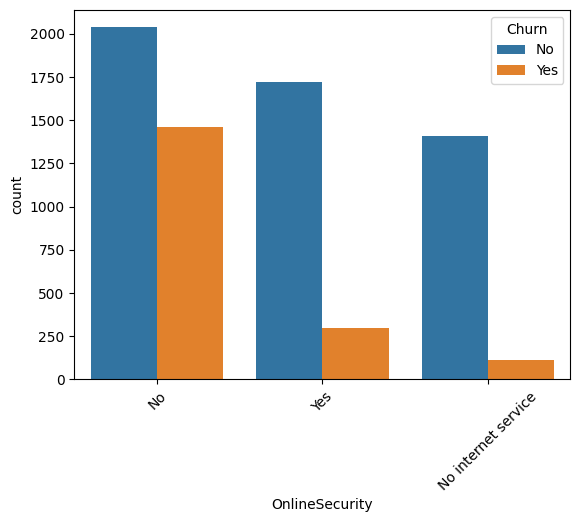

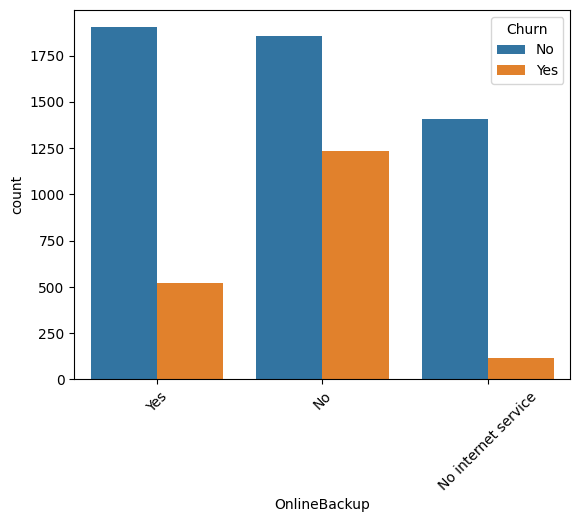

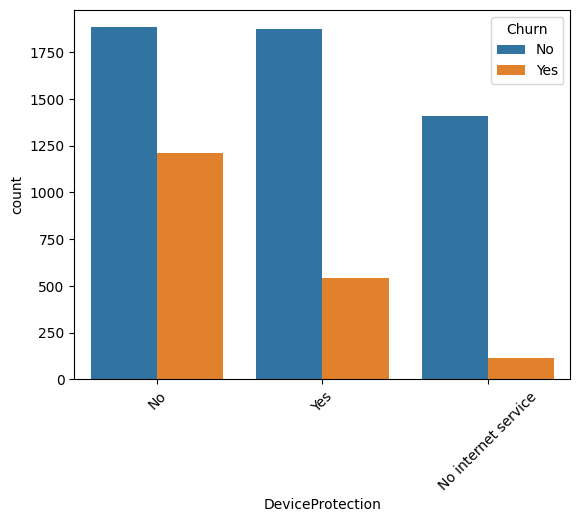

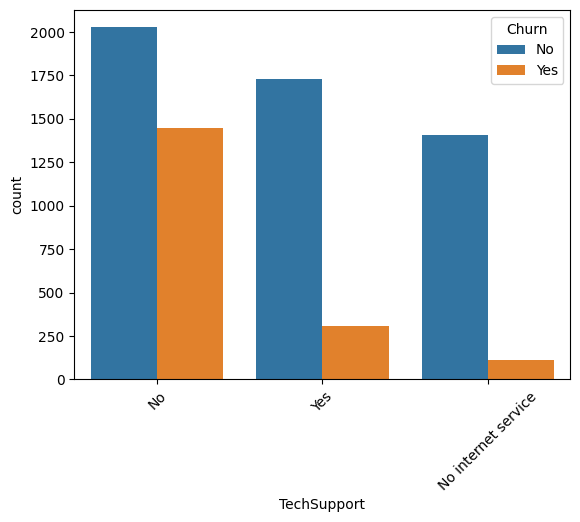

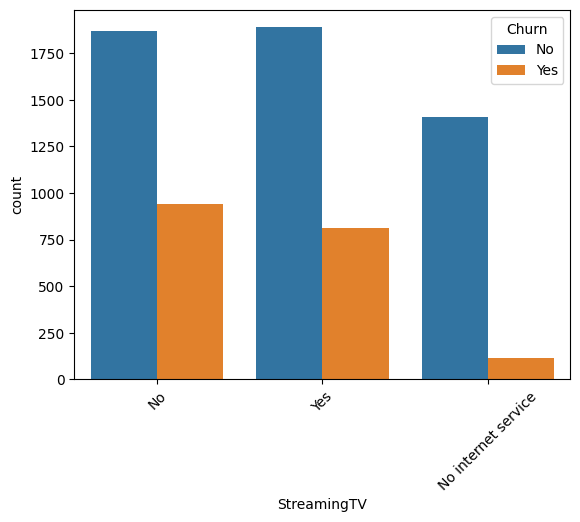

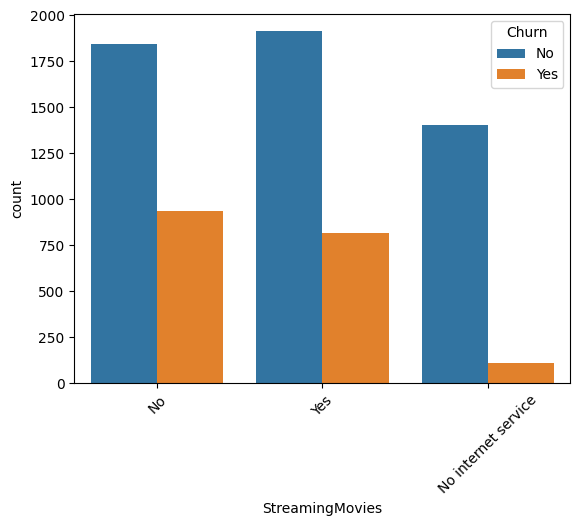

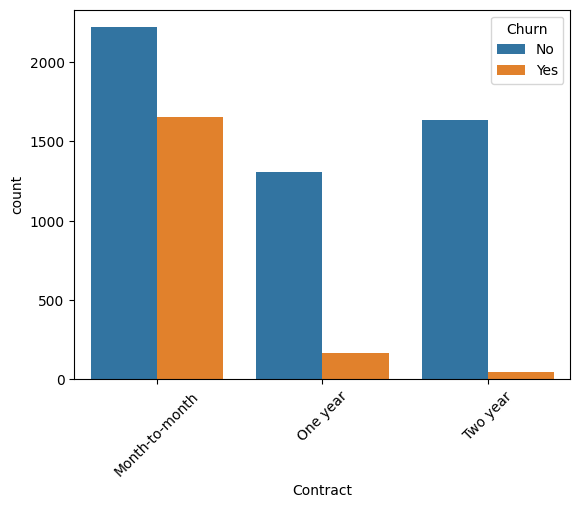

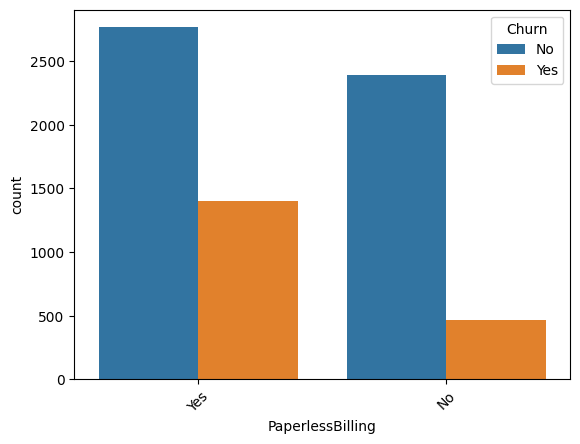

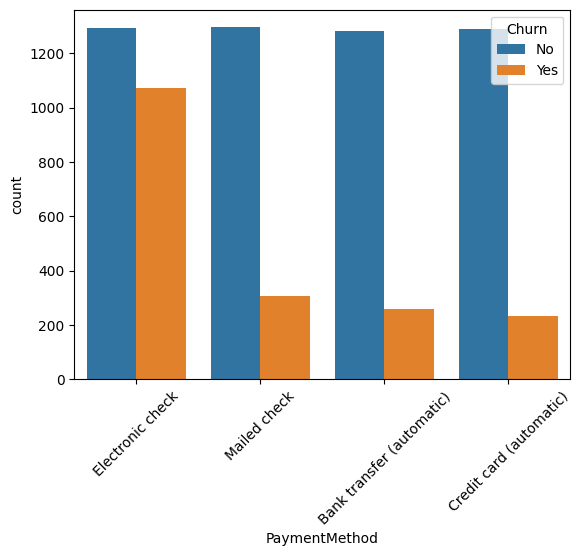

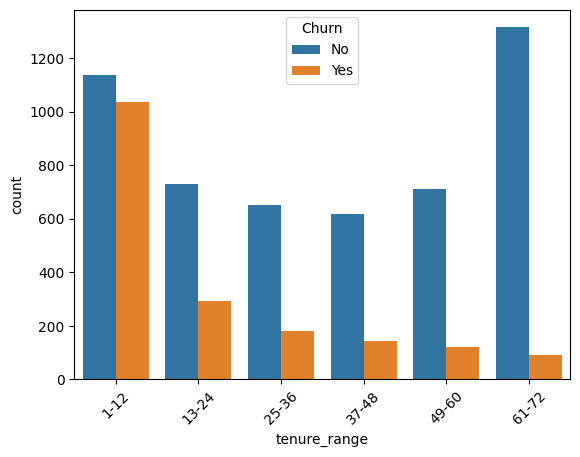

In [70]:
for i,col in enumerate(new_df.drop(columns=['Churn','TotalCharges','MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=new_df,x=col,hue=new_df['Churn'])
    plt.xticks(rotation=45)

### Analyze totalcharges and montly charges columns

Text(0.5, 1.0, 'Monthly charges by churn')

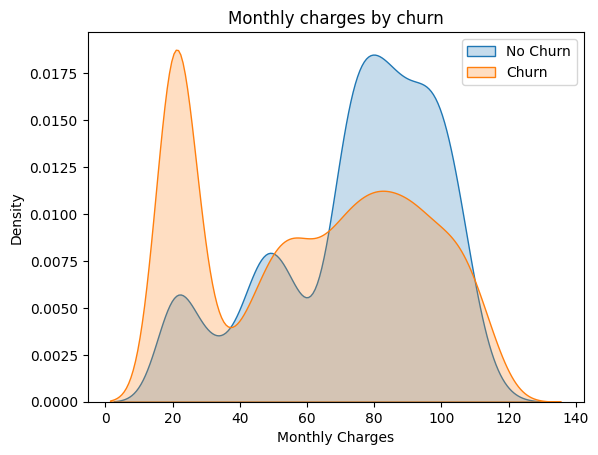

In [71]:
sns.kdeplot(new_df.MonthlyCharges[new_df['Churn']=='Yes'],shade=True)
sns.kdeplot(new_df.MonthlyCharges[new_df['Churn']=='No'],shade=True)
plt.legend(["No Churn","Churn"],loc='upper right')
plt.ylabel('Density')
plt.xlabel('Monthly Charges')
plt.title('Monthly charges by churn')

Observations:
1. People with high monthly charges are ikely to churn

Text(0.5, 1.0, 'Total charges by churn')

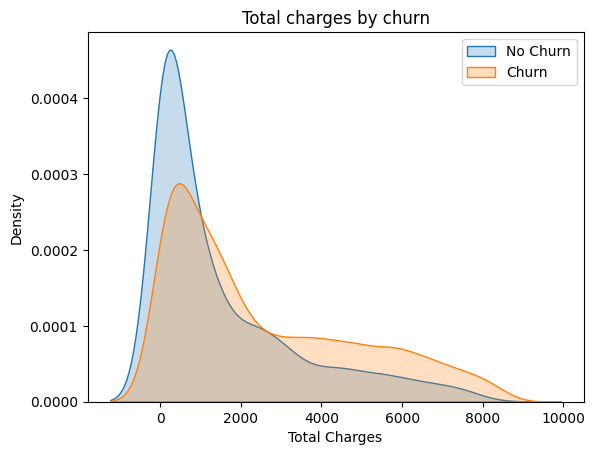

In [72]:
sns.kdeplot(new_df.TotalCharges[new_df['Churn']=='Yes'],shade=True)
sns.kdeplot(new_df.TotalCharges[new_df['Churn']=='No'],shade=True)
plt.legend(["No Churn","Churn"],loc='upper right')
plt.ylabel('Density')
plt.xlabel('Total Charges')
plt.title('Total charges by churn')

Observation:
1. People with high total charges are less likely to churn as they have to be commited to the plan,for reasons like high cost

### Bivariate analysis

<Axes: xlabel='TotalCharges', ylabel='MonthlyCharges'>

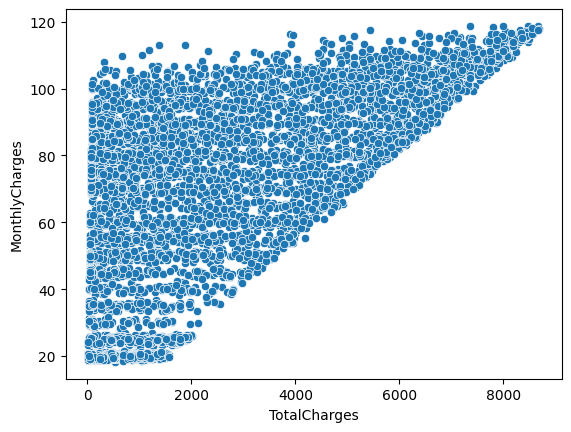

In [73]:
sns.scatterplot(x=new_df['TotalCharges'],y=new_df['MonthlyCharges'])

observation:
1. Total Charges increase as Monthly Charges increase - as expected

### Feature distribution for chured customers

In [74]:
churn=new_df[new_df['Churn']=='Yes']
nonchurn=new_df[new_df['Churn']=='No']

### Distribution of churned parameter with other parameters

([0, 1], [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

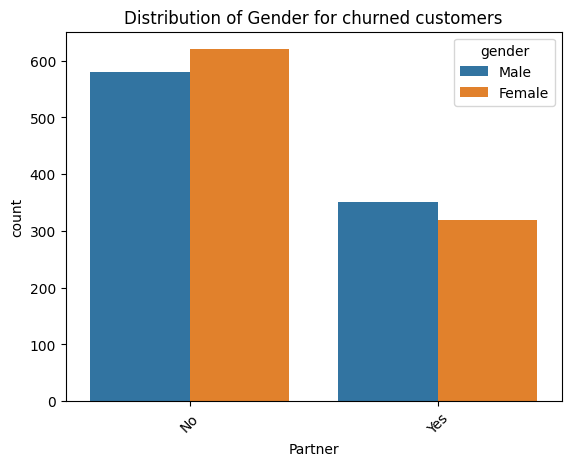

In [75]:
sns.countplot(data=churn,x=churn['Partner'],hue=churn['gender'])
plt.title("Distribution of Gender for churned customers")
plt.xticks(rotation=45)

([0, 1, 2, 3],
 [Text(0, 0, 'Mailed check'),
  Text(1, 0, 'Electronic check'),
  Text(2, 0, 'Bank transfer (automatic)'),
  Text(3, 0, 'Credit card (automatic)')])

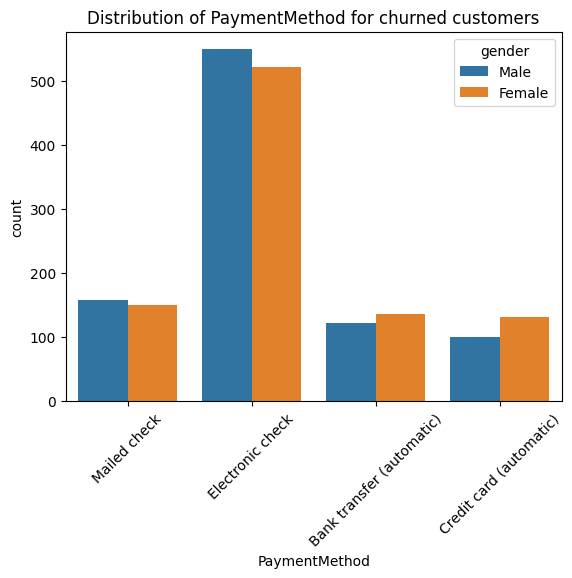

In [76]:
sns.countplot(data=churn,x=churn['PaymentMethod'],hue=churn['gender'])
plt.title("Distribution of PaymentMethod for churned customers")
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Distribution of Contract for churned customers')

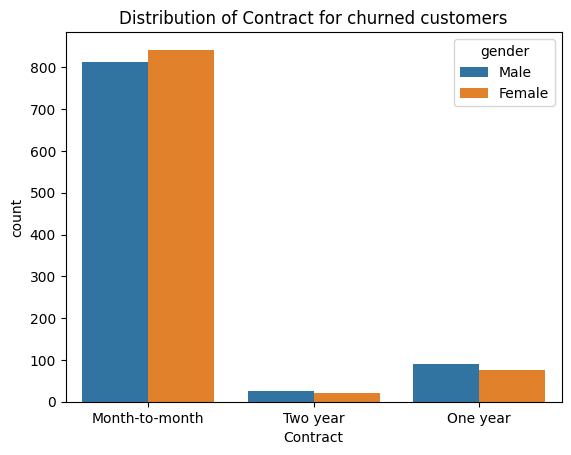

In [77]:
sns.countplot(data=churn,x=churn['Contract'],hue=churn['gender'])
plt.title("Distribution of Contract for churned customers")

Text(0.5, 1.0, 'Distribution of Techsupport for churned customers')

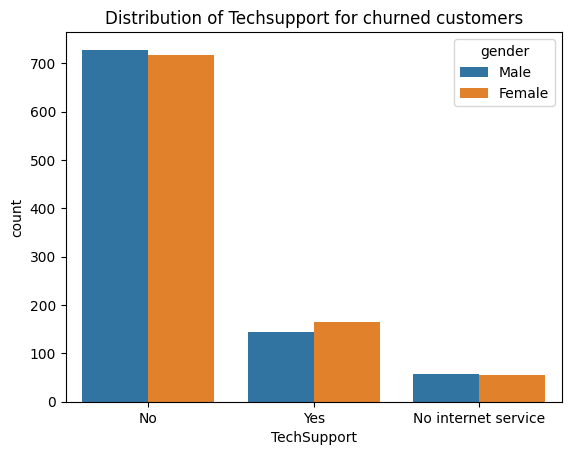

In [78]:
sns.countplot(data=churn,x=churn['TechSupport'],hue=churn['gender'])
plt.title("Distribution of Techsupport for churned customers")

Text(0.5, 1.0, 'Distribution of SeniorCitizen for churned customers')

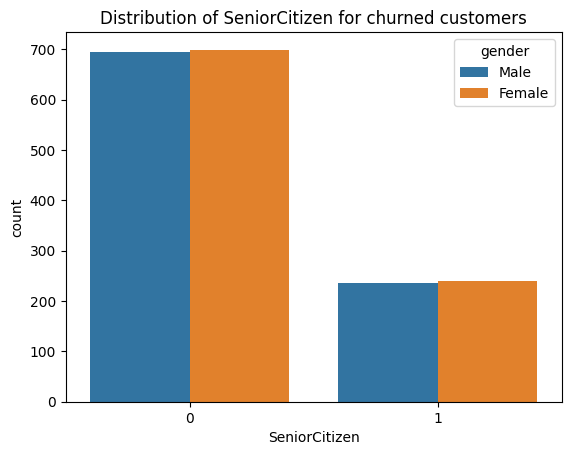

In [79]:
sns.countplot(data=churn,x=churn['SeniorCitizen'],hue=churn['gender'])
plt.title("Distribution of SeniorCitizen for churned customers")

### Distribution of Non-churned parameter with other parameters

Text(0.5, 1.0, 'Distribution of Gender for Non churned customers')

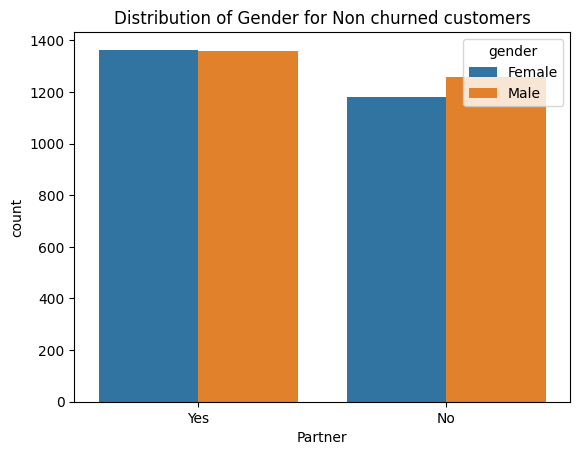

In [80]:
sns.countplot(data=nonchurn,x=nonchurn['Partner'],hue=nonchurn['gender'])
plt.title("Distribution of Gender for Non churned customers")

([0, 1, 2, 3],
 [Text(0, 0, 'Electronic check'),
  Text(1, 0, 'Mailed check'),
  Text(2, 0, 'Bank transfer (automatic)'),
  Text(3, 0, 'Credit card (automatic)')])

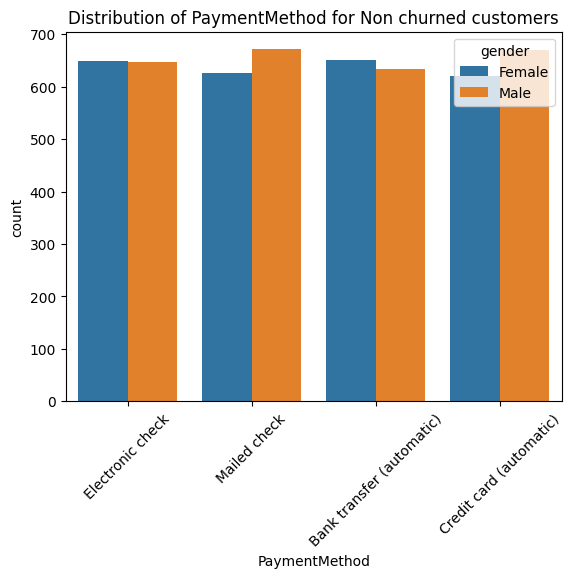

In [81]:
sns.countplot(data=nonchurn,x=nonchurn['PaymentMethod'],hue=nonchurn['gender'])
plt.title("Distribution of PaymentMethod for Non churned customers")
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Distribution of Contract for Non churned customers')

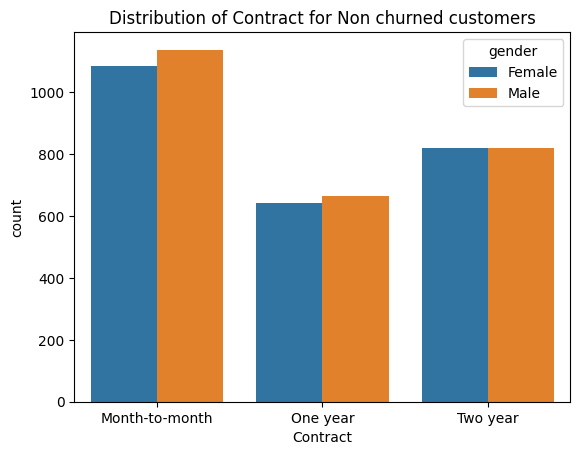

In [82]:
sns.countplot(data=nonchurn,x=nonchurn['Contract'],hue=nonchurn['gender'])
plt.title("Distribution of Contract for Non churned customers")

Text(0.5, 1.0, 'Distribution of Techsupport for Non-churned customers')

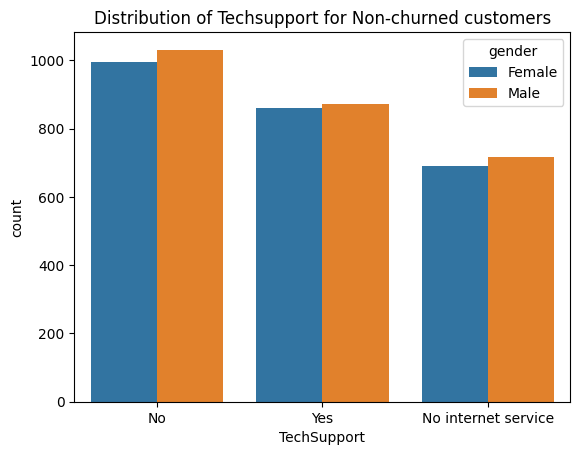

In [83]:
sns.countplot(data=nonchurn,x=nonchurn['TechSupport'],hue=nonchurn['gender'])
plt.title("Distribution of Techsupport for Non-churned customers")

Text(0.5, 1.0, 'Distribution of SeniorCitizen for Non churned customers')

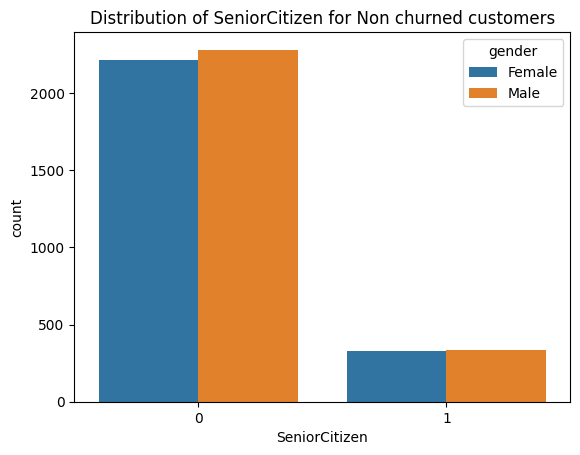

In [84]:
sns.countplot(data=nonchurn,x=nonchurn['SeniorCitizen'],hue=nonchurn['gender'])
plt.title("Distribution of SeniorCitizen for Non churned customers")

 Conclusion

1. Electronic check medium are the highest churners
2. Month to month contract type customers are the highest churners
3. People with no tech support are the highest churners

In [85]:
new_df.to_csv("telecom_data.csv")

In [86]:
new_df.sample(2)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_range
520,Male,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Electronic check,105.4,6989.45,No,61-72
229,Female,0,Yes,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),85.3,4107.25,No,37-48
